In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### FEMA Data Cleaning

The data has already been cleaned by selecting areas and events isolated to Illinois, but each file seems to refer back to a disaster ID number. Bringing that data in directly could make analysis easier

In [2]:
disaster_df = pd.read_csv('fema_data/DisasterDeclarationsSummaries_IL_Floods_Severe_Storms.csv')
print(disaster_df.dtypes)
print(disaster_df.shape)
disaster_df.head()

disasterNumber            int64
ihProgramDeclared         int64
iaProgramDeclared         int64
paProgramDeclared         int64
hmProgramDeclared         int64
state                    object
declarationDate          object
disasterType             object
incidentType             object
title                    object
incidentBeginDate        object
incidentEndDate          object
disasterCloseOutDate     object
declaredCountyArea       object
placeCode               float64
hash                     object
lastRefresh              object
dtype: object
(563, 17)


,disasterNumber,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,state,declarationDate,disasterType,incidentType,title,incidentBeginDate,incidentEndDate,disasterCloseOutDate,declaredCountyArea,placeCode,hash,lastRefresh
0,115,0,1,1,1,IL,1961-05-27T00:00:00 +00:00,DR,Flood,FLOODS & TORNADOES,1961-05-27T00:00:00 +00:00,1961-05-27T00:00:00 +00:00,1963-10-14T00:00:00 +00:00,NaN,NaN,9cd00a749158f95077a8b74edfc4833c,2015-08-04T01:43:17 +00:00
1,78,0,1,1,1,IL,1957-06-22T00:00:00 +00:00,DR,Flood,FLOODS,1957-06-22T00:00:00 +00:00,1957-06-22T00:00:00 +00:00,1959-03-01T00:00:00 +00:00,NaN,NaN,4ea87225ea5a7e3e8cf33c038cb087e3,2015-08-04T01:43:17 +00:00
2,262,0,1,1,0,IL,1969-06-06T00:00:00 +00:00,DR,Flood,FLOODING,1969-06-06T00:00:00 +00:00,1969-06-06T00:00:00 +00:00,1972-04-25T00:00:00 +00:00,Pike (County),99149.0,f0e0ac27aaa16a92750bc738327344d4,2016-08-30T15:07:51 +00:00
3,262,0,1,1,0,IL,1969-06-06T00:00:00 +00:00,DR,Flood,FLOODING,1969-06-06T00:00:00 +00:00,1969-06-06T00:00:00 +00:00,1972-04-25T00:00:00 +00:00,Mercer (County),99131.0,0638ec8faade048f38c5d68c776dcae3,2016-08-30T15:07:54 +00:00
4,262,0,1,1,0,IL,1969-06-06T00:00:00 +00:00,DR,Flood,FLOODING,1969-06-06T00:00:00 +00:00,1969-06-06T00:00:00 +00:00,1972-04-25T00:00:00 +00:00,Whiteside (County),99195.0,167a4e9fe33c295f91a9d8806c50bc4e,2016-08-30T15:07:52 +00:00


In [6]:
disaster_df['incidentBeginDate'] = pd.to_datetime(disaster_df['incidentBeginDate'])
disaster_recent = disaster_df.loc[disaster_df['incidentBeginDate'] >= '2000-01-01'].copy()
disaster_recent = disaster_recent.loc[disaster_recent['declaredCountyArea'] == 'Cook (County)'].copy()
disaster_recent.shape

(4, 17)

In [7]:
disaster_recent

,disasterNumber,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,state,declarationDate,disasterType,incidentType,title,incidentBeginDate,incidentEndDate,disasterCloseOutDate,declaredCountyArea,placeCode,hash,lastRefresh
477,1935,1,0,0,1,IL,2010-08-19T14:00:00 +00:00,DR,Severe Storm(s),SEVERE STORMS AND FLOODING,2010-07-19 14:36:00,2010-08-07T11:00:00 +00:00,NaN,Cook (County),99031.0,b9d2c6945b4f1dfcb6ced3f51e4ae50b,2016-08-30T15:08:20 +00:00
485,1800,1,1,1,1,IL,2008-10-03T18:30:00 +00:00,DR,Severe Storm(s),SEVERE STORMS AND FLOODING,2008-09-13 08:00:00,2008-10-05T00:00:00 +00:00,NaN,Cook (County),99031.0,dc37a07e247b6dd19da48cc9400c6997,2016-08-30T15:08:21 +00:00
494,1729,0,0,1,1,IL,2007-09-25T20:40:00 +00:00,DR,Severe Storm(s),SEVERE STORMS AND FLOODING,2007-08-20 15:30:00,2007-08-31T00:00:00 +00:00,2015-12-07T00:00:00 +00:00,Cook (County),99031.0,cb84f79b7e21df73b44e09b869e0918e,2016-08-30T15:08:18 +00:00
558,4116,1,0,0,1,IL,2013-05-10T18:15:00 +00:00,DR,Flood,"SEVERE STORMS, STRAIGHT-LINE WINDS, AND FLOODING",2013-04-16 09:37:00,2013-05-05T00:00:00 +00:00,NaN,Cook (County),99031.0,4b2c489628eac118e5cc56f9f642b8dd,2016-08-30T15:08:38 +00:00


In [21]:
#disaster_recent.to_csv('fema_data/cook_disasters_since_2000.csv',index=False)
disaster_merge = disaster_recent[['disasterNumber', 'declarationDate', 'title', 'incidentBeginDate', 'incidentEndDate']]
disaster_merge

,disasterNumber,declarationDate,title,incidentBeginDate,incidentEndDate
477,1935,2010-08-19T14:00:00 +00:00,SEVERE STORMS AND FLOODING,2010-07-19 14:36:00,2010-08-07T11:00:00 +00:00
485,1800,2008-10-03T18:30:00 +00:00,SEVERE STORMS AND FLOODING,2008-09-13 08:00:00,2008-10-05T00:00:00 +00:00
494,1729,2007-09-25T20:40:00 +00:00,SEVERE STORMS AND FLOODING,2007-08-20 15:30:00,2007-08-31T00:00:00 +00:00
558,4116,2013-05-10T18:15:00 +00:00,"SEVERE STORMS, STRAIGHT-LINE WINDS, AND FLOODING",2013-04-16 09:37:00,2013-05-05T00:00:00 +00:00


In [9]:
housing_owners = pd.read_csv('fema_data/HousingAssistanceOwners_IL_Cook_Flood_Storm.csv')
print(housing_owners.shape)
print(housing_owners.dtypes)
housing_owners.head()

(788, 26)
disasterNumber                              int64
incidentType                               object
state                                      object
county                                     object
city                                       object
zipCode                                     int64
validRegistrations                          int64
averageFemaInspectedDamage                  int64
totalInspected                              int64
totalDamage                                 int64
noFemaInspectedDamage                       int64
femaInspectedDamageBetween1And10000         int64
femaInspectedDamageBetween10001And20000     int64
femaInspectedDamageBetween20001And30000     int64
femaInspectedDamageGreaterThan30000         int64
approvedForFemaAssistance                   int64
totalApprovedIhpAmount                      int64
repairReplaceAmount                         int64
rentalAmount                                int64
otherNeedsAmount                        

,disasterNumber,incidentType,state,county,city,zipCode,validRegistrations,averageFemaInspectedDamage,totalInspected,totalDamage,...,totalApprovedIhpAmount,repairReplaceAmount,rentalAmount,otherNeedsAmount,approvedBetween1And10000,approvedBetween10001And25000,approvedBetween25001AndMax,totalMaxGrants,hash,lastRefresh
0,1935,Severe Storm(s),IL,Cook (County),BARTLETT,60133,1,6024,1,6024,...,6024,5565,0,459,1,0,0,0,a95a6ad3fab63e55cd9b357bce5677b0,2014-12-12T01:20:24 +00:00
1,1935,Severe Storm(s),IL,Cook (County),BLUE ISLAND,60406,302,1532,293,448908,...,512054,356465,124239,31350,184,4,2,1,53c2edbb5d7c0d859ce9f5d7f99a9d10,2014-12-12T01:20:24 +00:00
2,1935,Severe Storm(s),IL,Cook (County),BURR RIDGE,60527,5,4695,5,23476,...,26120,21050,2480,2590,4,1,0,0,e5633eaf08a3b5862b35eb104c111f03,2014-12-12T01:20:24 +00:00
3,1935,Severe Storm(s),IL,Cook (County),CAULMET CITY,60409,1,313,1,313,...,233,0,0,233,1,0,0,0,8cdaa614b3b5b9ff5f4a83d6957e0838,2014-12-12T01:20:24 +00:00
4,1935,Severe Storm(s),IL,Cook (County),CHIAGO,60637,1,0,1,0,...,0,0,0,0,0,0,0,0,e695139db13f5e3ba025c875dfafa7b2,2014-11-20T15:20:20 +00:00


In [14]:
housing_owners['city'].unique()

array(['BARTLETT', 'BLUE ISLAND', 'BURR RIDGE', 'CAULMET CITY', 'CHIAGO',
       'CHICAGI', 'CHGO', 'CHICAGO', 'CHICAGOI', 'CHICGAGO', 'CICERO',
       'COUNTRYSIDE', 'DOLTON ', 'EVANSTON', 'FRANKFORT', 'HARVEY',
       'HINSDALE', 'LAGRANGE', 'LYNWOOD', 'MAYWOOD', 'MERRINOTTE PARK',
       'NORTH LAKE', 'OLYMPIA FIELDS', 'PARK FOREST', 'RICHTON PARK',
       'ROSELLE', 'ALSIP', 'BRAODVIEW', 'BELLLWOOD', 'CALUMET CITY',
       'CGICAGO', 'CHICAAGO', 'CHICAGIO', 'CHICAGOP', 'CRETE', 'ELGIN',
       'CHICGO', 'EVERGREEN', 'GHICAGO', 'HARWOOD HEIGHTS',
       'HOFFMAN ESTATES', 'LA GRANGE PARK', 'LYONS', 'MAYWWOD',
       'MIDLOTHIAN', 'NORTH RIVERSIDE', 'ORLAND HILLS', 'PARKFOREST',
       'RIVERDALDE', 'BERWYN', 'CALUMET PK', 'BURNHAM ', 'CHICAGGO',
       'CHICATO', 'COUNTRYCLUB HILLS', 'DOLTON', 'FOREST VIEW', 'HARVE',
       'HILLSIDE', 'LOMBARD', 'LA GRANGE', 'OAK PARK', 'MELRROSE PARK',
       'PALOS PARK', 'NORTHBROOK', 'ROLLING MEADOWS', 'ADDISON',
       'BEDFORD PARK', 'BOLINGB

In [28]:
# There are some creative misspellings of Chicago, making a list of them and just pulling those rows
chi_names = ['CHIAGO', 'CHICAGI', 'CHGO', 'CHICAGO', 'CHICAGOI', 'CHICGAGO', 'CGICAGO', 
             'CHICAAGO', 'CHICAGIO', 'CHICAGOP', 'CHICGO', 'GHICAGO', 'CHICAGGO','CHICATO',
             'CHICAGO IL', 'CHICGAO', 'CHCIAGO', 'CHICAG', 'CHICAO', 'CHCAGO', 'CHICAHO',
             'CHHICAGO', 'CHICASGO', 'CHICACO', 'CHIC AGO', 'CHUCAGO', 'CHIHAGO']
chi_housing_owners = housing_owners.loc[housing_owners['city'].isin(chi_names)].copy()
chi_housing_owners['city'] = 'Chicago'
print(chi_housing_owners.shape)
chi_housing_owners.head()

(230, 26)


,disasterNumber,incidentType,state,county,city,zipCode,validRegistrations,averageFemaInspectedDamage,totalInspected,totalDamage,...,totalApprovedIhpAmount,repairReplaceAmount,rentalAmount,otherNeedsAmount,approvedBetween1And10000,approvedBetween10001And25000,approvedBetween25001AndMax,totalMaxGrants,hash,lastRefresh
4,1935,Severe Storm(s),IL,Cook (County),Chicago,60637,1,0,1,0,...,0,0,0,0,0,0,0,0,e695139db13f5e3ba025c875dfafa7b2,2014-11-20T15:20:20 +00:00
5,1935,Severe Storm(s),IL,Cook (County),Chicago,60641,1,1829,1,1829,...,0,0,0,0,0,0,0,0,155f92c09a904ffeb04efc36c64617ec,2014-12-12T01:20:24 +00:00
6,1935,Severe Storm(s),IL,Cook (County),Chicago,60628,1,2634,1,2634,...,1888,1888,0,0,1,0,0,0,78be3ad69148dc33a6cde1c94cbd3900,2014-12-12T01:20:24 +00:00
7,1935,Severe Storm(s),IL,Cook (County),Chicago,60468,1,0,1,0,...,0,0,0,0,0,0,0,0,c22c84732b8eeead7c4917322d61239f,2014-11-20T15:20:20 +00:00
8,1935,Severe Storm(s),IL,Cook (County),Chicago,60613,5,4376,5,21878,...,20496,20496,0,0,2,1,0,0,52ea04f86159e6434c4db44fd8cb4bae,2014-12-12T01:20:24 +00:00


In [29]:
chi_housing_recent = chi_housing_owners.merge(disaster_merge, on='disasterNumber', how='right')
print(chi_housing_recent.shape)
chi_housing_recent.head()

(231, 30)


,disasterNumber,incidentType,state,county,city,zipCode,validRegistrations,averageFemaInspectedDamage,totalInspected,totalDamage,...,approvedBetween1And10000,approvedBetween10001And25000,approvedBetween25001AndMax,totalMaxGrants,hash,lastRefresh,declarationDate,title,incidentBeginDate,incidentEndDate
0,1935.0,Severe Storm(s),IL,Cook (County),Chicago,60637.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,e695139db13f5e3ba025c875dfafa7b2,2014-11-20T15:20:20 +00:00,2010-08-19T14:00:00 +00:00,SEVERE STORMS AND FLOODING,2010-07-19 14:36:00,2010-08-07T11:00:00 +00:00
1,1935.0,Severe Storm(s),IL,Cook (County),Chicago,60641.0,1.0,1829.0,1.0,1829.0,...,0.0,0.0,0.0,0.0,155f92c09a904ffeb04efc36c64617ec,2014-12-12T01:20:24 +00:00,2010-08-19T14:00:00 +00:00,SEVERE STORMS AND FLOODING,2010-07-19 14:36:00,2010-08-07T11:00:00 +00:00
2,1935.0,Severe Storm(s),IL,Cook (County),Chicago,60628.0,1.0,2634.0,1.0,2634.0,...,1.0,0.0,0.0,0.0,78be3ad69148dc33a6cde1c94cbd3900,2014-12-12T01:20:24 +00:00,2010-08-19T14:00:00 +00:00,SEVERE STORMS AND FLOODING,2010-07-19 14:36:00,2010-08-07T11:00:00 +00:00
3,1935.0,Severe Storm(s),IL,Cook (County),Chicago,60468.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,c22c84732b8eeead7c4917322d61239f,2014-11-20T15:20:20 +00:00,2010-08-19T14:00:00 +00:00,SEVERE STORMS AND FLOODING,2010-07-19 14:36:00,2010-08-07T11:00:00 +00:00
4,1935.0,Severe Storm(s),IL,Cook (County),Chicago,60613.0,5.0,4376.0,5.0,21878.0,...,2.0,1.0,0.0,0.0,52ea04f86159e6434c4db44fd8cb4bae,2014-12-12T01:20:24 +00:00,2010-08-19T14:00:00 +00:00,SEVERE STORMS AND FLOODING,2010-07-19 14:36:00,2010-08-07T11:00:00 +00:00


In [30]:
housing_renters = pd.read_csv('fema_data/HousingAssistanceRenters_IL_Cook_Flood_Storm.csv')
print(housing_renters.shape)
print(housing_renters.dtypes)
housing_renters.head()

(614, 23)
disasterNumber                   int64
incidentType                    object
state                           object
county                          object
city                            object
zipCode                          int64
validRegistrations               int64
totalInspected                   int64
totalInspectedWithNoDamage       int64
totalWithModerateDamage          int64
totalWithMajorDamage             int64
totalWithSubstantialDamage       int64
approvedForFemaAssistance        int64
totalApprovedIhpAmount           int64
repairReplaceAmount              int64
rentalAmount                     int64
otherNeedsAmount                 int64
approvedBetween1And10000         int64
approvedBetween10001And25000     int64
approvedBetween25001AndMax       int64
totalMaxGrants                   int64
hash                            object
lastRefresh                     object
dtype: object


,disasterNumber,incidentType,state,county,city,zipCode,validRegistrations,totalInspected,totalInspectedWithNoDamage,totalWithModerateDamage,...,totalApprovedIhpAmount,repairReplaceAmount,rentalAmount,otherNeedsAmount,approvedBetween1And10000,approvedBetween10001And25000,approvedBetween25001AndMax,totalMaxGrants,hash,lastRefresh
0,1935,Severe Storm(s),IL,Cook (County),BROOKFIELD,60513,29,28,28,0,...,54698,0,37078,17620,13,1,0,0,e939ce76a82945a1b4d0ecc593834bc7,2014-11-20T15:20:38 +00:00
1,1935,Severe Storm(s),IL,Cook (County),BELLWOOD,60153,1,1,1,0,...,7594,0,2030,5564,1,0,0,0,bb53044f3f1daf6c877324c6c5ba185e,2014-11-20T15:20:38 +00:00
2,1935,Severe Storm(s),IL,Cook (County),CHCAGO,60651,1,1,1,0,...,459,0,0,459,1,0,0,0,0c2848a1b3d37ca216e40d7266d70007,2014-11-20T15:20:38 +00:00
3,1935,Severe Storm(s),IL,Cook (County),CHICAGO,60641,124,121,121,0,...,384907,0,220266,164641,60,9,1,1,2c28933c6fcfbd4a651ce9948460ccfd,2014-11-20T15:20:38 +00:00
4,1935,Severe Storm(s),IL,Cook (County),CHICAGO,60609,939,903,903,0,...,1935289,0,1189333,745956,514,32,5,1,45fd7be16116532bcb712b0196adfbd2,2014-11-20T15:20:38 +00:00


In [31]:
housing_renters['city'].unique()

array(['BROOKFIELD', 'BELLWOOD', 'CHCAGO', 'CHICAGO', 'CRETE', 'CHICOAG',
       'EVANSTON', 'CHGOHTS', 'HANOVER PARK', 'HINES', 'LAGRANGE', 'LYONS',
       'MELROSE PARK', 'OAKPARK', 'NORTHLAKE', 'PARKFOREST', 'RIVER GROVE',
       'SCHILLER PARK', 'SUMMIT', 'WILMETTE', 'BROADVIEW', 'CCICERO',
       'CHGO', 'CHICAO', 'COUNTTRY CLUB HILLS', 'ELMWOOD PARK', 'GLENVIEW',
       'HILLSIDE', 'OAK PARK', 'WESTERN SPRINGS', 'LOMBARD', 'RIVERDALE',
       'SCHAUMBURG', 'NORTHBROOK', 'STONE PARK', 'JUSTICE', 'PARK FOREST',
       'CHICGO', 'LA GRANGE', 'GLENWOOD', 'CENTRAL STICKNEY',
       'ELMWOODPARK', 'CRESTWOOD', 'LYNWOOD', 'WILLOW SPRINGS',
       'NORTH CHICAGO', 'STREAMWOOD', 'S CHICAGO HGTS', 'RIVER FOREST',
       'ALSIP', 'BERKELEY', 'CHCIAGO', 'BURHAM', 'CHICAGO APT B',
       'DES PLAINES', 'CICERO', 'HARVEY', 'HOFFMAN EST',
       'LAKE IN THE HILLS', 'MARKHAM', 'MELROSE PSRK', 'N RIVERSIDE',
       'ORLAND HILLS', 'ROBBINS', 'PEMBROKE TOWNSHIP', 'SKOKIE',
       'THORNTON', 'BEL

In [32]:
# Fix misspellings again
chi_names = ['CHCAGO', 'CHICAGO', 'CHICOAG', 'CHGO', 'CHICAO', 'CHICGO', 'CHCIAGO', 'CHICAGO APT B', 'CHICAAGO', 'CHICAGO ',
             'CHICAGOIL', 'CHICAGO IL']
chi_housing_renters = housing_renters.loc[housing_renters['city'].isin(chi_names)].copy()
chi_housing_renters['city'] = 'Chicago'
print(chi_housing_renters.shape)
chi_housing_renters.head()

(178, 23)


,disasterNumber,incidentType,state,county,city,zipCode,validRegistrations,totalInspected,totalInspectedWithNoDamage,totalWithModerateDamage,...,totalApprovedIhpAmount,repairReplaceAmount,rentalAmount,otherNeedsAmount,approvedBetween1And10000,approvedBetween10001And25000,approvedBetween25001AndMax,totalMaxGrants,hash,lastRefresh
2,1935,Severe Storm(s),IL,Cook (County),Chicago,60651,1,1,1,0,...,459,0,0,459,1,0,0,0,0c2848a1b3d37ca216e40d7266d70007,2014-11-20T15:20:38 +00:00
3,1935,Severe Storm(s),IL,Cook (County),Chicago,60641,124,121,121,0,...,384907,0,220266,164641,60,9,1,1,2c28933c6fcfbd4a651ce9948460ccfd,2014-11-20T15:20:38 +00:00
4,1935,Severe Storm(s),IL,Cook (County),Chicago,60609,939,903,903,0,...,1935289,0,1189333,745956,514,32,5,1,45fd7be16116532bcb712b0196adfbd2,2014-11-20T15:20:38 +00:00
5,1935,Severe Storm(s),IL,Cook (County),Chicago,60827,148,141,141,0,...,115366,0,55140,60226,57,2,0,0,7001b15646afa6bc79214521253ef5c5,2014-11-20T15:20:38 +00:00
6,1935,Severe Storm(s),IL,Cook (County),Chicago,60630,11,11,11,0,...,2234,0,0,2234,1,0,0,0,23567187d20f65ae2ba4bb0849a91e0a,2014-11-20T15:20:38 +00:00


In [33]:
chi_rent_recent = chi_housing_renters.merge(disaster_merge, on='disasterNumber', how='right')
print(chi_rent_recent.shape)
chi_rent_recent.head()

(179, 27)


,disasterNumber,incidentType,state,county,city,zipCode,validRegistrations,totalInspected,totalInspectedWithNoDamage,totalWithModerateDamage,...,approvedBetween1And10000,approvedBetween10001And25000,approvedBetween25001AndMax,totalMaxGrants,hash,lastRefresh,declarationDate,title,incidentBeginDate,incidentEndDate
0,1935.0,Severe Storm(s),IL,Cook (County),Chicago,60651.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0c2848a1b3d37ca216e40d7266d70007,2014-11-20T15:20:38 +00:00,2010-08-19T14:00:00 +00:00,SEVERE STORMS AND FLOODING,2010-07-19 14:36:00,2010-08-07T11:00:00 +00:00
1,1935.0,Severe Storm(s),IL,Cook (County),Chicago,60641.0,124.0,121.0,121.0,0.0,...,60.0,9.0,1.0,1.0,2c28933c6fcfbd4a651ce9948460ccfd,2014-11-20T15:20:38 +00:00,2010-08-19T14:00:00 +00:00,SEVERE STORMS AND FLOODING,2010-07-19 14:36:00,2010-08-07T11:00:00 +00:00
2,1935.0,Severe Storm(s),IL,Cook (County),Chicago,60609.0,939.0,903.0,903.0,0.0,...,514.0,32.0,5.0,1.0,45fd7be16116532bcb712b0196adfbd2,2014-11-20T15:20:38 +00:00,2010-08-19T14:00:00 +00:00,SEVERE STORMS AND FLOODING,2010-07-19 14:36:00,2010-08-07T11:00:00 +00:00
3,1935.0,Severe Storm(s),IL,Cook (County),Chicago,60827.0,148.0,141.0,141.0,0.0,...,57.0,2.0,0.0,0.0,7001b15646afa6bc79214521253ef5c5,2014-11-20T15:20:38 +00:00,2010-08-19T14:00:00 +00:00,SEVERE STORMS AND FLOODING,2010-07-19 14:36:00,2010-08-07T11:00:00 +00:00
4,1935.0,Severe Storm(s),IL,Cook (County),Chicago,60630.0,11.0,11.0,11.0,0.0,...,1.0,0.0,0.0,0.0,23567187d20f65ae2ba4bb0849a91e0a,2014-11-20T15:20:38 +00:00,2010-08-19T14:00:00 +00:00,SEVERE STORMS AND FLOODING,2010-07-19 14:36:00,2010-08-07T11:00:00 +00:00


In [34]:
# chi_housing_recent.to_csv('chi_housing_assistance_owners.csv',index=False)
# chi_rent_recent.to_csv('chi_housing_assistance_renters.csv',index=False)

In [35]:
# Not sure if this dataset is relevant, ignoring for now
public_assistance = pd.read_csv('fema_data/PublicAssistanceApplicants_IL_Flood_Storm.csv')
print(public_assistance.shape)
print(public_assistance.dtypes)
public_assistance.head()

(2152, 11)
disasterNumber     int64
incidentType      object
applicantId       object
state             object
applicantName     object
addressLine1      object
addressLine2      object
city              object
zipCode           object
hash              object
lastRefresh       object
dtype: object


,disasterNumber,incidentType,applicantId,state,applicantName,addressLine1,addressLine2,city,zipCode,hash,lastRefresh
0,1278,Severe Storm(s),085-0020E-00,Illinois,JO-CARROLL ELECTRIC COOPERATIVE,NaN,NaN,NaN,NaN,0f50aaab48b75fffc38a364d28b51a1f,2014-11-23T01:12:52 +00:00
1,1278,Severe Storm(s),085-00B3E-00,Illinois,SCALES MOUND COMMUNITY UNIT SCHOOL DISTRICT 211,NaN,NaN,NaN,NaN,e7ca25223bef88b4d80a07f65a9f363e,2014-11-23T01:12:52 +00:00
2,1278,Severe Storm(s),085-48359-00,Illinois,"MENOMINEE, VILLAGE OF",NaN,NaN,NaN,NaN,0acb98871bf2c2b2ed8f164fb7a9fa7b,2014-11-23T01:12:52 +00:00
3,1278,Severe Storm(s),085-00B27-00,Illinois,MENOMINEE TOWNSHIP ROAD DISTRICT,NaN,NaN,NaN,NaN,c3e2d8993f24bbced059a7b466758a35,2014-11-23T01:12:52 +00:00
4,1278,Severe Storm(s),085-00B44-00,Illinois,WOODBINE TOWNSHIP ROAD DISTRICT,NaN,NaN,NaN,NaN,b0a25ed1022ef24ae17ecddf0257c045,2014-11-23T01:12:52 +00:00


In [36]:
reg_data = pd.read_csv('fema_data/RegistrationIntakeIndividualsHouseholdPrograms_IL_Cook_Flood_Storm.csv')
print(reg_data.shape)
print(reg_data.dtypes)
reg_data.head()

(877, 21)
disasterNumber                    int64
incidentType                     object
state                            object
county                           object
city                             object
zipCode                           int64
totalValidRegistrations           int64
validCallCenterRegistrations      int64
validWebRegistrations             int64
validMobileRegistrations          int64
ihpReferrals                      int64
ihpEligible                       int64
ihpAmount                       float64
haReferrals                       int64
haEligible                        int64
haAmount                        float64
onaReferrals                      int64
onaEligible                       int64
onaAmount                       float64
hash                             object
lastRefresh                      object
dtype: object


,disasterNumber,incidentType,state,county,city,zipCode,totalValidRegistrations,validCallCenterRegistrations,validWebRegistrations,validMobileRegistrations,...,ihpEligible,ihpAmount,haReferrals,haEligible,haAmount,onaReferrals,onaEligible,onaAmount,hash,lastRefresh
0,4116,Flood,IL,Cook (County),BEDFORD PARK,60501,1,0,1,0,...,0,0.00,1,0,0.00,0,0,0.00,bd7e19a0c8dac7872a90d5a28bf03735,2014-11-23T02:38:03 +00:00
1,4116,Flood,IL,Cook (County),BROOKFIELD,60513,425,121,285,19,...,338,1147160.02,390,327,1063029.85,317,95,84130.17,1a4c6b1bed0af9764a881a4c5b47ea0a,2014-11-23T02:38:03 +00:00
2,4116,Flood,IL,Cook (County),CHGO,60644,1,0,1,0,...,0,0.00,1,0,0.00,0,0,0.00,7b94c8cc82eaebb8a56647758ae70fb8,2014-11-23T02:38:03 +00:00
3,4116,Flood,IL,Cook (County),CHICAGO,60614,7,2,5,0,...,3,2936.20,6,1,888.26,7,2,2047.94,0649825eca55c3ae07678b2afd7ea2d9,2014-11-23T02:38:03 +00:00
4,4116,Flood,IL,Cook (County),CHICAGO,60624,1175,753,349,73,...,692,2255862.26,1107,553,1650428.98,990,396,605433.28,c6e8298ee56b528cf98adb00bcac7639,2015-03-02T19:03:16 +00:00


In [37]:
reg_data['city'].unique()

array(['BEDFORD PARK', 'BROOKFIELD', 'CHGO', 'CHICAGO', 'CHICAGO RIDGE',
       'DESPLAINES', 'EVANSTON', 'HARWOOD HTS', 'FRANKLIN PARK',
       'HOMEWOOD', 'LANSING', 'MAYWOOD', 'NORRIDGE', 'OAK PARK',
       'PALOS PARK', 'RIVER GROVE', 'SCHAUMBURG', 'STEGER', 'TINLEY PARK',
       'BELLWOOD', 'BUFFALO GROVE', 'CHIHAGO', 'GLENCOE', 'HAZEL CREST',
       'INDIAN HEAD PARK', 'LEMONT', 'MC COOK', 'NORTHBROOK', 'OAKPARK',
       'PARK FOREST', 'RIVERSIDE', 'S CHICAGO HTS', 'UNIVERSITY PARK',
       'STICKNEY', 'BENSENVILLE', 'BURBANK', 'CHUCAGO',
       'DES PLAINES APT GS', 'GLENVIEW', 'HAZELCREST', 'INVERNESS',
       'LINCOLNWOOD', 'MELROSE PARK', 'NORTHFIELD', 'OLYMPIA FIELDS',
       'PARK RIDGE', 'ROBBINS', 'SCHILLER PARK', 'STONE PARK',
       'WESTCHESTER', 'ADDISON', 'BERKELEY', 'BURNHAM', 'CICERO',
       'EVANSTON ', 'DIXMOOR', 'HICKORY HILLS', 'JUSTICE', 'LYNWOOD',
       'NORTHLAKE', 'ORLAND HILLS', 'PEORIA', 'ROLLING MEADOWS',
       'SCHILLER PK', 'STREAMWOOD', 'WESTERN SP

In [38]:
# Cleaning up Chicago names again
# Fix misspellings again
chi_names = ['CHGO', 'CHICAGO', 'CHIHAGO', 'CHUCAGO', 'CHICGO', 'CGICAGO', 'CHICAG', 'CHHICAGO', 'CHCAGO', 'CHIAGO', 'CHCIAGO', 
             'CHICAGGO', 'CHICAGI', 'CHG', 'CHICAAGO', 'CHICAGIO', 'CHICACO', 'CHIC AGO', 'CHICAGO IL', 'CHICATO', 'CHICAGO ', 
             'CHICAGOP', 'CHICGAO', 'CHICAHO', 'CHICAGOI', 'CHICAO', 'CHICASGO', 'CHICOAG', 'CHICAGOIL', 'CHICGAGO', 'CHICAGO APT B']
chi_reg = reg_data.loc[reg_data['city'].isin(chi_names)].copy()
chi_reg['city'] = 'Chicago'
print(chi_reg.shape)
chi_reg.head()

(257, 21)


,disasterNumber,incidentType,state,county,city,zipCode,totalValidRegistrations,validCallCenterRegistrations,validWebRegistrations,validMobileRegistrations,...,ihpEligible,ihpAmount,haReferrals,haEligible,haAmount,onaReferrals,onaEligible,onaAmount,hash,lastRefresh
2,4116,Flood,IL,Cook (County),Chicago,60644,1,0,1,0,...,0,0.00,1,0,0.00,0,0,0.00,7b94c8cc82eaebb8a56647758ae70fb8,2014-11-23T02:38:03 +00:00
3,4116,Flood,IL,Cook (County),Chicago,60614,7,2,5,0,...,3,2936.20,6,1,888.26,7,2,2047.94,0649825eca55c3ae07678b2afd7ea2d9,2014-11-23T02:38:03 +00:00
4,4116,Flood,IL,Cook (County),Chicago,60624,1175,753,349,73,...,692,2255862.26,1107,553,1650428.98,990,396,605433.28,c6e8298ee56b528cf98adb00bcac7639,2015-03-02T19:03:16 +00:00
5,4116,Flood,IL,Cook (County),Chicago,60636,2571,1,584,135,...,1539,3448754.61,2423,1237,2751573.28,2068,710,697181.33,dbf38848961f88ee280ab76643e34bc7,2015-03-02T19:03:16 +00:00
6,4116,Flood,IL,Cook (County),Chicago,60659,154,75,70,9,...,103,169962.97,140,97,152721.00,110,31,17241.97,4b8febc4bdd1081d41d68e6afdcfb8d5,2014-11-23T02:38:03 +00:00


In [39]:
chi_reg_recent = chi_reg.merge(disaster_merge, on='disasterNumber', how='right')
print(chi_reg_recent.shape)
chi_reg_recent.head()

(258, 25)


,disasterNumber,incidentType,state,county,city,zipCode,totalValidRegistrations,validCallCenterRegistrations,validWebRegistrations,validMobileRegistrations,...,haAmount,onaReferrals,onaEligible,onaAmount,hash,lastRefresh,declarationDate,title,incidentBeginDate,incidentEndDate
0,4116.0,Flood,IL,Cook (County),Chicago,60644.0,1.0,0.0,1.0,0.0,...,0.00,0.0,0.0,0.00,7b94c8cc82eaebb8a56647758ae70fb8,2014-11-23T02:38:03 +00:00,2013-05-10T18:15:00 +00:00,"SEVERE STORMS, STRAIGHT-LINE WINDS, AND FLOODING",2013-04-16 09:37:00,2013-05-05T00:00:00 +00:00
1,4116.0,Flood,IL,Cook (County),Chicago,60614.0,7.0,2.0,5.0,0.0,...,888.26,7.0,2.0,2047.94,0649825eca55c3ae07678b2afd7ea2d9,2014-11-23T02:38:03 +00:00,2013-05-10T18:15:00 +00:00,"SEVERE STORMS, STRAIGHT-LINE WINDS, AND FLOODING",2013-04-16 09:37:00,2013-05-05T00:00:00 +00:00
2,4116.0,Flood,IL,Cook (County),Chicago,60624.0,1175.0,753.0,349.0,73.0,...,1650428.98,990.0,396.0,605433.28,c6e8298ee56b528cf98adb00bcac7639,2015-03-02T19:03:16 +00:00,2013-05-10T18:15:00 +00:00,"SEVERE STORMS, STRAIGHT-LINE WINDS, AND FLOODING",2013-04-16 09:37:00,2013-05-05T00:00:00 +00:00
3,4116.0,Flood,IL,Cook (County),Chicago,60636.0,2571.0,1.0,584.0,135.0,...,2751573.28,2068.0,710.0,697181.33,dbf38848961f88ee280ab76643e34bc7,2015-03-02T19:03:16 +00:00,2013-05-10T18:15:00 +00:00,"SEVERE STORMS, STRAIGHT-LINE WINDS, AND FLOODING",2013-04-16 09:37:00,2013-05-05T00:00:00 +00:00
4,4116.0,Flood,IL,Cook (County),Chicago,60659.0,154.0,75.0,70.0,9.0,...,152721.00,110.0,31.0,17241.97,4b8febc4bdd1081d41d68e6afdcfb8d5,2014-11-23T02:38:03 +00:00,2013-05-10T18:15:00 +00:00,"SEVERE STORMS, STRAIGHT-LINE WINDS, AND FLOODING",2013-04-16 09:37:00,2013-05-05T00:00:00 +00:00


In [40]:
#chi_reg_recent.to_csv('fema_data/chi_registration_intake.csv',index=False)

In [43]:
chi_reg_recent['zipCode'].unique()

array([ 60644.,  60614.,  60624.,  60636.,  60659.,  60646.,  60290.,
        60615.,  60625.,  60637.,  60647.,  60660.,  60604.,  60616.,
        60626.,  60638.,  60649.,  60661.,  60630.,  60605.,  60617.,
        60628.,  60639.,  60651.,  60666.,  60607.,  60618.,  60629.,
        60640.,  60652.,  60678.,  60609.,  60620.,  60631.,  60642.,
        60654.,  60803.,  60608.,  60619.,  60641.,  60653.,  60707.,
        60610.,  60621.,  60632.,  60643.,  60655.,  60827.,  60612.,
        60633.,  60622.,  60656.,  60613.,  60623.,  60634.,  60657.,
        60645.,  60477.,  60686.,  60479.,  60706.,  60104.,  60606.,
        60131.,  60627.,  60155.,  60411.,  60443.,  60611.,  60601.,
        60468.,  60020.,  60684.,  66039.,  60693.,  60658.,  60714.,
        60805.,  60673.,  66017.,  66019.,  60689.,  69619.,  60804.,
        60663.,     nan])

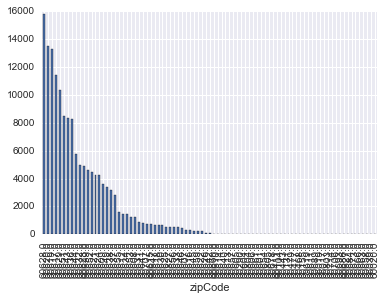

In [46]:
reg_zip = chi_reg_recent.groupby(['zipCode'])['totalValidRegistrations'].sum()
reg_zip = reg_zip.sort_values(ascending=False)
reg_zip.plot(kind='bar')

In [49]:
reg_zip_df = pd.DataFrame(reg_zip).reset_index()
reg_zip_df.head()

,zipCode,totalValidRegistrations
0,60628.0,15787.0
1,60620.0,13474.0
2,60619.0,13295.0
3,60617.0,11404.0
4,60629.0,10323.0


In [50]:
reg_zip_df.to_csv('housing_assistance_reg_by_zip.csv',index=False)